In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from tensorflow import keras
from sklearn.metrics import *

In [4]:
yelp_data = pd.read_csv('../input/yelp-data-balanced-25/yelp_data_balanced_25.csv')
yelp_data = yelp_data[yelp_data['target'] != "Neutral"]

In [5]:
yelp_data.shape

(50000, 4)

Text(0, 0.5, 'Number of Reviews')

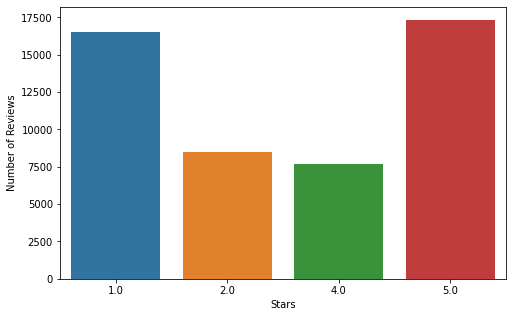

In [6]:
plot_df = yelp_data['stars'].value_counts()
x = np.array(plot_df.index)
y = np.array(plot_df.values)
plt.figure(figsize=(8,5))
sns.barplot(x = x, y = y)
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

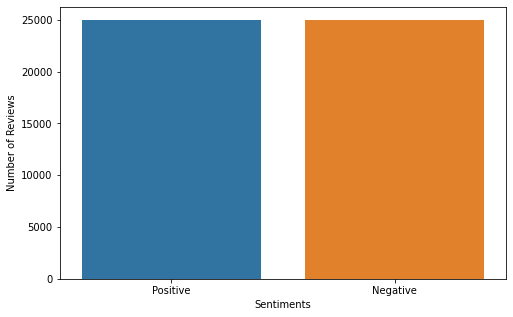

In [7]:
plot_df = yelp_data['target'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x = np.array(plot_df.index), y = np.array(plot_df.values))
plt.xlabel('Sentiments')
plt.ylabel('Number of Reviews')

In [8]:
'Review: ', yelp_data['text'][0]

('Review: ',
 "Really enjoyed how clean the salon was. The nail technicians were very friendly and kind. They did an amazing job on my nails. I've tried several locations around carmel/Indy, this is my new favorite spot.")

In [9]:
yelp_data = yelp_data.dropna()

In [10]:
yelp_data['text'] = yelp_data['text'].apply(str.lower)

In [11]:
stop_words = set(stopwords.words('english'))

In [12]:
yelp_data['text'] = yelp_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [13]:
def is_en_word(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [14]:
yelp_data['text'] = yelp_data['text'].apply(lambda x: ' '.join([word for word in x.split() if is_en_word(word)]))

In [15]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
yelp_data['text'] = yelp_data['text'].apply(lambda x: ' '.join(tokenizer.tokenize(x)))

In [16]:
yelp_data['text'] = yelp_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word.isalpha()]))

In [17]:
words = set(nltk.corpus.words.words())
yelp_data['text'] = yelp_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word in words]))

In [18]:
'Review: ', yelp_data['text'][0]

('Review: ',
 'really clean salon was nail friendly kind amazing job i tried several around indy new favorite spot')

In [19]:
yelp_data.head()

,Unnamed: 0,stars,text,target
0,0,5.0,really clean salon was nail friendly kind amaz...,Positive
1,1,4.0,cold war motif family friendly wait staff nice...,Positive
2,2,5.0,can t say enough good purple pumpkin live main...,Positive
3,3,5.0,always go owner awesome spend much time give c...,Positive
4,4,4.0,deceptively vast one star deduction primarily ...,Positive


In [20]:
yelp_data.target.value_counts()

Positive    25000
Negative    25000
Name: target, dtype: int64

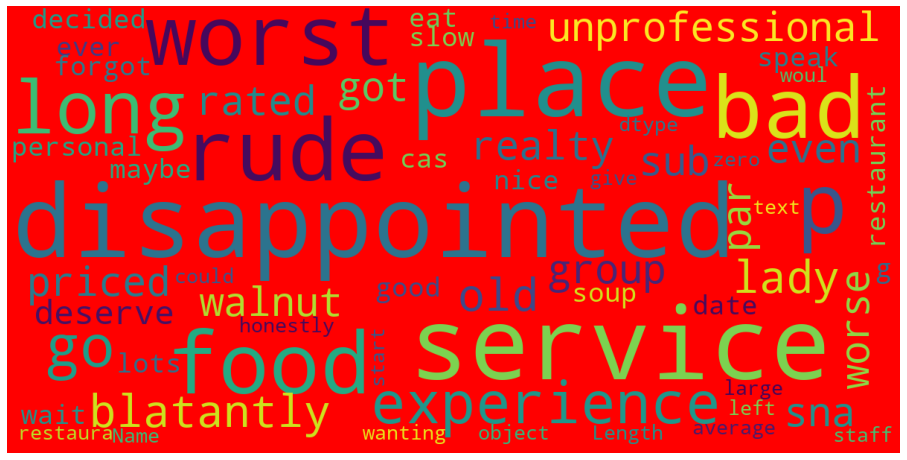

In [21]:
wordcloud = WordCloud(
    background_color='red',
    stopwords=stop_words,
    max_words=1000,
    max_font_size=45, 
    scale=3,
    random_state=1
).generate(str(yelp_data[yelp_data['stars'] < 3]['text']))

fig = plt.figure(1, figsize=(16, 16))
plt.axis('off') 
plt.imshow(wordcloud)
plt.show()

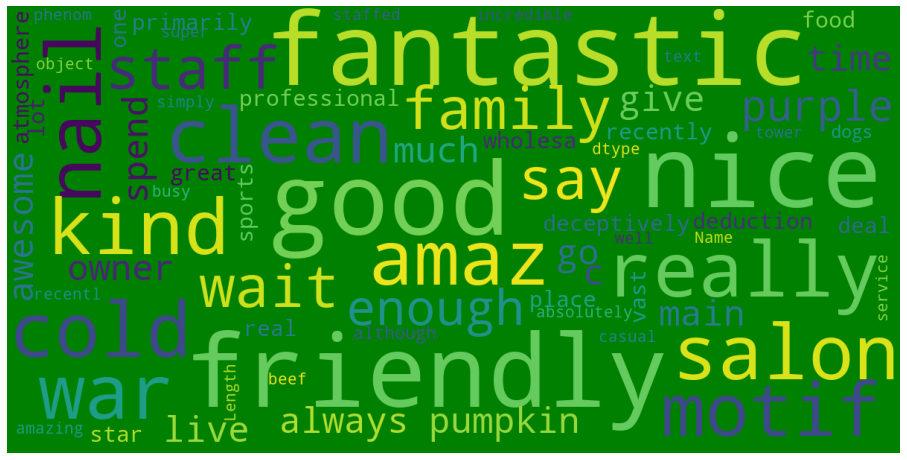

In [22]:
wordcloud = WordCloud(
    background_color='green',
    stopwords=stop_words,
    max_words=1000,
    max_font_size=45, 
    scale=3,
    random_state=1
).generate(str(yelp_data[yelp_data['stars'] > 3]['text']))

fig = plt.figure(1, figsize=(16, 16))
plt.axis('off') 
plt.imshow(wordcloud)
plt.show()

In [23]:
X = yelp_data['text']
y = yelp_data['target'].to_numpy()

In [24]:
y.shape

(50000,)

In [26]:
y_onehot=OneHotEncoder().fit(y.reshape(-1, 1))
y_onehot=y_onehot.transform(y.reshape(-1, 1))

In [27]:
labels = y_onehot.toarray()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=16)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35000,), (15000,), (35000, 2), (15000, 2))

In [30]:
vocab_size = 20000

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train) 

In [31]:
max_length = 100
X_train_pad = pad_sequences(X_train_sequences, maxlen=max_length)

In [32]:
X_train_pad[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,  257,   64,    2,  130,   75, 2975,  225,   74,  337,  421,
         49], dtype=int32)

In [33]:
y_train_int = y_train.astype("int")

In [34]:
print('Shape of data:', X_train_pad.shape)
print('Shape of labels:', y_train_int.shape)

Shape of data: (35000, 100)
Shape of labels: (35000, 2)


In [35]:
embedding_dim = 10000

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=max_length))
model.add(layers.RNN(layers.GRUCell(4)))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())

model.add(layers.Dense(4,activation='elu'))
model.add(layers.Dropout(0.5))


model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 10000)        200000000 
_________________________________________________________________
rnn (RNN)                    (None, 4)                 120072    
_________________________________________________________________
dropout (Dropout)            (None, 4)                 0         
_________________________________________________________________
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1

2022-04-26 19:12:35.571175: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 19:12:35.665833: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 19:12:35.666609: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 19:12:35.667947: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [36]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=0)

In [37]:
history = model.fit(X_train_pad, y_train_int,
                    epochs=100,
                    verbose=True,
                    validation_split=0.33,
                    callbacks=[es_callback])

2022-04-26 19:12:38.390747: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
733/733 [==============================] - 212s 286ms/step - loss: 0.4844 - accuracy: 0.7650 - val_loss: 0.2807 - val_accuracy: 0.8912


In [39]:
X_test_sequences = tokenizer.texts_to_sequences(X_test) 
X_test_pad = pad_sequences(X_test_sequences, maxlen=max_length)
y_test_int = y_test.astype("int")

In [40]:
print("GRU")
print("Evaluate on test data")
results = model.evaluate(X_test_pad, y_test_int)
print("test loss, test acc:", results)

GRU
Evaluate on test data
469/469 [==============================] - 9s 18ms/step - loss: 0.2913 - accuracy: 0.8867
test loss, test acc: [0.2913300096988678, 0.88673335313797]


In [41]:
y_pred = model.predict(X_test_pad)

In [44]:
matrix = confusion_matrix(y_test_int.argmax(axis=1), y_pred.argmax(axis=1))
matrix

array([[6870,  747],
       [ 952, 6431]])

In [45]:
print('Precision Score: ', precision_score(y_test_int.argmax(axis=1), y_pred.argmax(axis=1), average="macro"))
print('Recall Score: ', recall_score(y_test_int.argmax(axis=1), y_pred.argmax(axis=1), average='macro'))
print('F1 Score: ',f1_score(y_test_int.argmax(axis=1), y_pred.argmax(axis=1), average='macro'))
print('Accuracy Score: ',accuracy_score(y_test_int.argmax(axis=1), y_pred.argmax(axis=1)))

Precision Score:  0.8871120057102233
Recall Score:  0.8864925101506036
F1 Score:  0.8866362329842531
Accuracy Score:  0.8867333333333334


In [47]:
model2 = Sequential()
model2.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=max_length))


model2.add(layers.SimpleRNN(64,return_sequences=True))
model2.add(layers.Dropout(0.3))
model2.add(layers.Flatten())

model2.add(layers.Dense(64,activation='elu'))
model2.add(layers.Dropout(0.5))

model2.add(layers.Dense(2, activation='softmax'))

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

hist2 = model2.fit(X_train_pad, y_train_int,
                    epochs=10,
                    verbose=True,
                    validation_split=0.33,
                    batch_size=16,
                    callbacks=[es_callback])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 10000)        200000000 
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100, 64)           644160    
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 64)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                409664    
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

In [52]:
print("Simple RNN")
print("Evaluate on test data")
results = model2.evaluate(X_test_pad, y_test_int)
print("test loss, test acc:", results)


Simple RNN
Evaluate on test data
469/469 [==============================] - 9s 19ms/step - loss: 0.2913 - accuracy: 0.8867
test loss, test acc: [0.2913300096988678, 0.88673335313797]


In [53]:
y_pred = model2.predict(X_test_pad)

In [54]:
matrix = confusion_matrix(y_test_int.argmax(axis=1), y_pred.argmax(axis=1))
matrix

array([[6870,  747],
       [ 952, 6431]])

In [55]:
print('Precision Score: ', precision_score(y_test_int.argmax(axis=1), y_pred.argmax(axis=1), average="macro"))
print('Recall Score: ', recall_score(y_test_int.argmax(axis=1), y_pred.argmax(axis=1), average='macro'))
print('F1 Score: ',f1_score(y_test_int.argmax(axis=1), y_pred.argmax(axis=1), average='macro'))
print('Accuracy Score: ',accuracy_score(y_test_int.argmax(axis=1), y_pred.argmax(axis=1)))

Precision Score:  0.8871120057102233
Recall Score:  0.8864925101506036
F1 Score:  0.8866362329842531
Accuracy Score:  0.8867333333333334
